In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [2]:
df=pd.read_csv(r'C:\Users\JANARDHAN\Downloads\ThoracicSurgery.csv')

In [3]:
df.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [4]:
df.describe()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
count,454.000000,454.000000,454.00000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,3.092511,3.287952,2.51685,0.795154,0.059471,0.136564,0.055066,0.696035,0.171806,1.733480,0.074890,0.004405,0.017621,0.828194,0.004405,62.777533,0.151982
std,0.715817,0.872347,0.77189,0.531459,0.236766,0.343765,0.228361,0.460475,0.377628,0.707499,0.263504,0.066299,0.131715,0.377628,0.066299,8.449634,0.359400
min,1.000000,1.440000,0.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000
25%,3.000000,2.600000,1.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.000000,3.160000,2.36000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.000000,3.840000,2.97750,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,8.000000,6.300000,5.48000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [5]:
live = df[df['Death_1yr'] == 0]
death = df[df['Death_1yr'] == 1]
cond = ['FVC','FEV1','Performance','Pain','Haemoptysis','Dyspnoea','Cough','Weakness',\
       'Tumor_Size','Diabetes_Mellitus','MI_6mo','PAD','Smoking','Asthma','Age']
l = [np.mean(live[c]) for c in cond]
d = [np.mean(death[c]) for c in cond]
ld = pd.DataFrame(data={'Attribute' : cond,'Live 1yr Mean' : l,'Death 1yr Mean' : d})
ld = ld.set_index('Attribute')
print('Death: {:d}, Live: {:d}'.format(len(death), len(live)))
print("1 tear death: {:.2f}% out of 454 patients".format(np.mean(df.Death_1yr)*100))
ld

Death: 69, Live: 385
1 tear death: 15.20% out of 454 patients


,Live 1yr Mean,Death 1yr Mean
Attribute,,
FVC,3.304597,3.195072
FEV1,2.540805,2.383188
Performance,0.774026,0.913043
Pain,0.051948,0.101449
Haemoptysis,0.124675,0.202899
Dyspnoea,0.044156,0.115942
Cough,0.677922,0.797101
Weakness,0.158442,0.246377
Tumor_Size,1.683117,2.014493


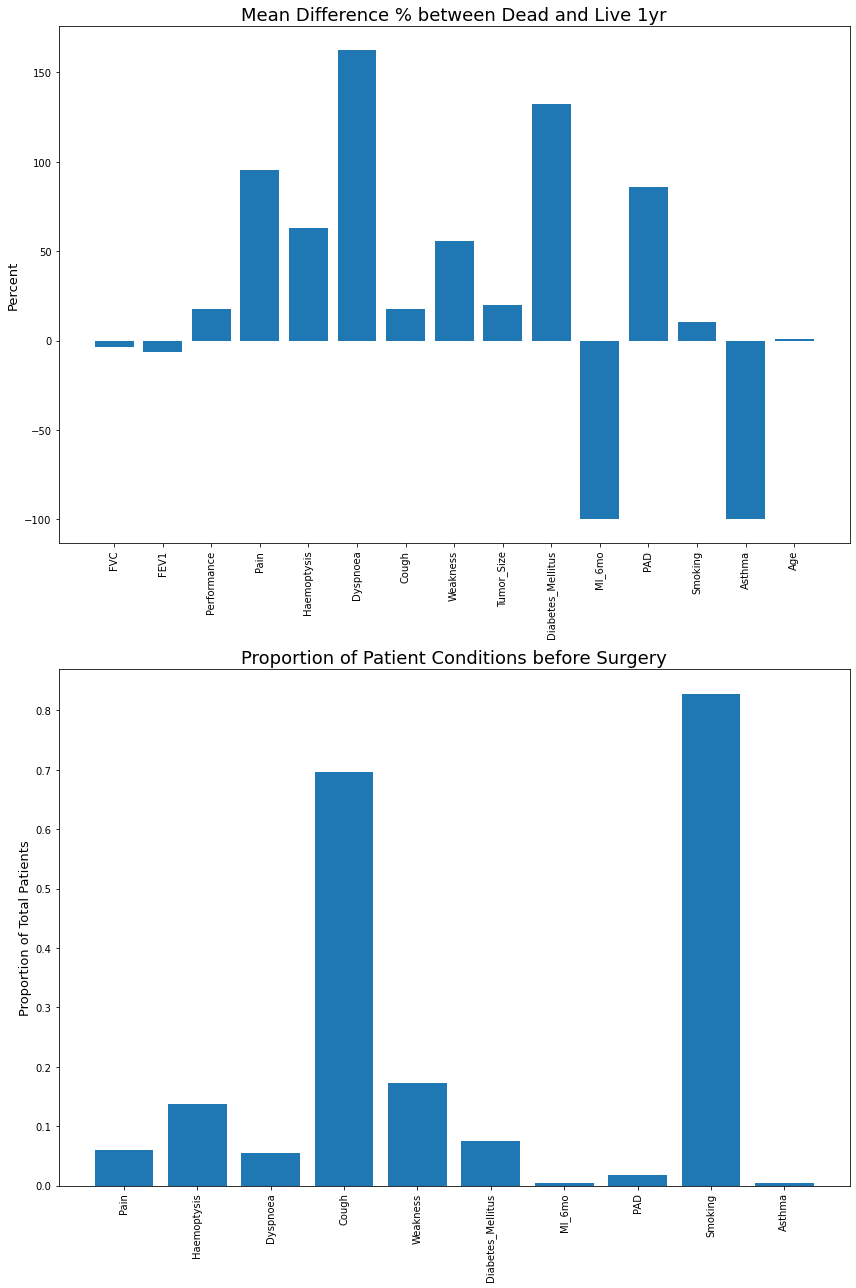

In [6]:
d= np.array(d)
l = np.array(l)
p_diff =(d-l)/l*100
fig, axes = plt.subplots(2,1,figsize=(12,18))
axes[0].bar(cond,p_diff)
axes[0].set_title('Mean Difference % between Dead and Live 1yr', fontsize=18)
axes[0].set_xticks(cond)
axes[0].set_xticklabels(cond, rotation=90)
axes[0].set_ylabel('Percent', fontsize=13)
tf_col = ['Pain','Haemoptysis','Dyspnoea','Cough','Weakness','Diabetes_Mellitus','MI_6mo','PAD','Smoking','Asthma']
tf_sum = [df[col].sum()/454 for col in tf_col]
axes[1].bar(tf_col, tf_sum)
axes[1].set_xticks(tf_col)
axes[1].set_xticklabels(tf_col, rotation = 90)
axes[1].set_ylabel('Proportion of Total Patients', fontsize=13)
axes[1].set_title('Proportion of Patient Conditions before Surgery', fontsize =18)
plt.tight_layout()

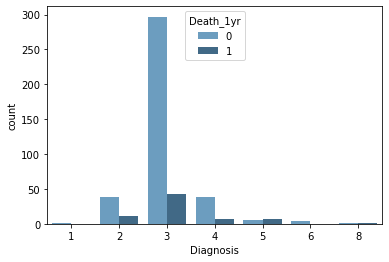

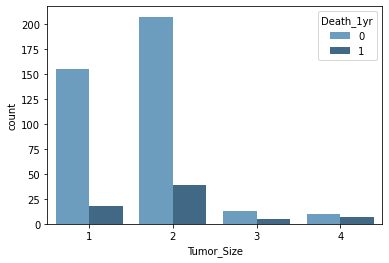

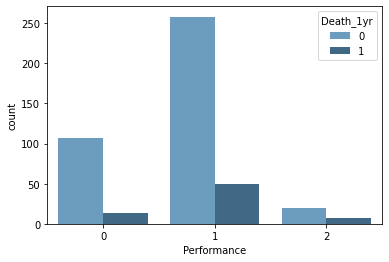

In [7]:
 import seaborn as sns  
sns.countplot(x='Diagnosis',hue='Death_1yr',data=df,palette='Blues_d')  
plt.show() 
sns.countplot(x='Tumor_Size',hue='Death_1yr',data=df,palette='Blues_d')  
plt.show() 
sns.countplot(x='Performance',hue='Death_1yr',data=df,palette='Blues_d')  
plt.show() 

In [8]:
df.shape

(454, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Diagnosis          454 non-null    int64  
 1   FVC                454 non-null    float64
 2   FEV1               454 non-null    float64
 3   Performance        454 non-null    int64  
 4   Pain               454 non-null    int64  
 5   Haemoptysis        454 non-null    int64  
 6   Dyspnoea           454 non-null    int64  
 7   Cough              454 non-null    int64  
 8   Weakness           454 non-null    int64  
 9   Tumor_Size         454 non-null    int64  
 10  Diabetes_Mellitus  454 non-null    int64  
 11  MI_6mo             454 non-null    int64  
 12  PAD                454 non-null    int64  
 13  Smoking            454 non-null    int64  
 14  Asthma             454 non-null    int64  
 15  Age                454 non-null    int64  
 16  Death_1yr          454 non

In [10]:
 df.isnull()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
450,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
451,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
452,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
 df.isnull().sum()

Diagnosis            0
FVC                  0
FEV1                 0
Performance          0
Pain                 0
Haemoptysis          0
Dyspnoea             0
Cough                0
Weakness             0
Tumor_Size           0
Diabetes_Mellitus    0
MI_6mo               0
PAD                  0
Smoking              0
Asthma               0
Age                  0
Death_1yr            0
dtype: int64

In [12]:
df.drop(['FVC'],axis=1, inplace=True)

In [13]:
x=df.iloc[:,0:15].values
y=df.iloc[:,15:16].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print('Shape of x_train {}'.format(x_train.shape))
print('Shape of y_train {}'.format(y_train.shape))
print('Shape of x_train {}'.format(x_test.shape))
print('Shape of y_train {}'.format(y_test.shape))

Shape of x_train (363, 15)
Shape of y_train (363, 1)
Shape of x_train (91, 15)
Shape of y_train (91, 1)


In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test =  sc.fit_transform(x_test)

In [15]:
def decisionTree(x_train, x_test, y_train, y_test):
    dt= DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    yPred = dt.predict(x_test)
    print('***DecisionTreeClassifier***')
    print('Confusion matrix')
    print (confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test, yPred))

In [16]:
decisionTree(x_train, x_test, y_train, y_test)

***DecisionTreeClassifier***
Confusion matrix
[[60 14]
 [13  4]]
Classification report
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        74
           1       0.22      0.24      0.23        17

    accuracy                           0.70        91
   macro avg       0.52      0.52      0.52        91
weighted avg       0.71      0.70      0.71        91



In [17]:
def randomForest(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    yPred = rf.predict(x_test)
    print('***RandomForestClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [18]:
randomForest(x_train, x_test, y_train, y_test)

C:\Users\JANARDHAN\AppData\Local\Temp/ipykernel_18044/2273288791.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


***RandomForestClassifier***
Confusion matrix
[[73  1]
 [17  0]]
Classification report
              precision    recall  f1-score   support

           0       0.81      0.99      0.89        74
           1       0.00      0.00      0.00        17

    accuracy                           0.80        91
   macro avg       0.41      0.49      0.45        91
weighted avg       0.66      0.80      0.72        91



In [19]:
def KNN(x_train, x_test, y_train, y_test): 
    knn = KNeighborsClassifier() 
    knn.fit(x_train, y_train) 
    yPred = knn.predict(x_test) 
    print('KNeighboursClassifier') 
    print('Confusion matrix') 
    print(confusion_matrix(y_test,yPred)) 
    print('Classification report') 
    print(classification_report(y_test,yPred))

In [20]:
KNN(x_train, x_test, y_train, y_test)

KNeighboursClassifier
Confusion matrix
[[72  2]
 [16  1]]
Classification report
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        74
           1       0.33      0.06      0.10        17

    accuracy                           0.80        91
   macro avg       0.58      0.52      0.49        91
weighted avg       0.73      0.80      0.74        91



D:\anakonda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [21]:
def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train,y_train)
    yPred = xg.predict(x_test)
    print('*** GradientBoostingClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classifier report')
    print(classification_report(y_test,yPred))

In [22]:
xgboost(x_train, x_test, y_train, y_test)

*** GradientBoostingClassifier***
Confusion matrix
[[70  4]
 [17  0]]
Classifier report
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        74
           1       0.00      0.00      0.00        17

    accuracy                           0.77        91
   macro avg       0.40      0.47      0.43        91
weighted avg       0.65      0.77      0.71        91



D:\anakonda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [23]:
def compareModel(x_train, x_test, y_train, y_test):
    decisionTree(x_train, x_test, y_train, y_test)
    print('-'*100)
    randomForest(x_train, x_test, y_train, y_test)
    print('-'*100)
    KNN(x_train, x_test, y_train, y_test)
    print('-'*100)
    xgboost(x_train, x_test, y_train, y_test)
    print('-'*100)

In [24]:
compareModel(x_train, x_test, y_train, y_test)

***DecisionTreeClassifier***
Confusion matrix
[[58 16]
 [12  5]]
Classification report
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        74
           1       0.24      0.29      0.26        17

    accuracy                           0.69        91
   macro avg       0.53      0.54      0.53        91
weighted avg       0.72      0.69      0.70        91

----------------------------------------------------------------------------------------------------


C:\Users\JANARDHAN\AppData\Local\Temp/ipykernel_18044/2273288791.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


***RandomForestClassifier***
Confusion matrix
[[73  1]
 [17  0]]
Classification report
              precision    recall  f1-score   support

           0       0.81      0.99      0.89        74
           1       0.00      0.00      0.00        17

    accuracy                           0.80        91
   macro avg       0.41      0.49      0.45        91
weighted avg       0.66      0.80      0.72        91

----------------------------------------------------------------------------------------------------
KNeighboursClassifier
Confusion matrix
[[72  2]
 [16  1]]
Classification report
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        74
           1       0.33      0.06      0.10        17

    accuracy                           0.80        91
   macro avg       0.58      0.52      0.49        91
weighted avg       0.73      0.80      0.74        91

------------------------------------------------------------------------------

D:\anakonda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\anakonda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.80      0.95      0.87        74
           1       0.00      0.00      0.00        17

    accuracy                           0.77        91
   macro avg       0.40      0.47      0.43        91
weighted avg       0.65      0.77      0.71        91

----------------------------------------------------------------------------------------------------


In [25]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
yPred = rf.predict(x_test)

C:\Users\JANARDHAN\AppData\Local\Temp/ipykernel_18044/1724286394.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


In [26]:
f1_score(yPred,y_test,average='weighted')

0.8804610024122219

In [27]:
cv = cross_val_score(rf,x,y,cv=5)

D:\anakonda\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anakonda\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anakonda\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anakonda\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

In [28]:
np.mean(cv)

0.8414163614163614

In [29]:
import pickle
pickle.dump(rf,open('model.pkl','wb'))